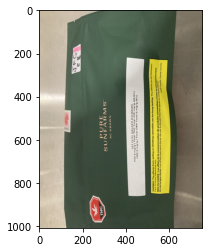

1/1 [==============================] - 0s 397ms/step
Predicted class label: JET FUEL GELATO
Confidence: 99.8 %
Product: JET FUEL GELATO
Brand: PURE SUNFARMS
THC: 22%
CBD: 0%
Strain: Hybrid


In [44]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

dfModel = pd.read_csv(r'C:\Users\User1\Desktop\Arc\Project Files\Flask\modelProductList.csv')

# Initialize an empty array to store the preprocessed images
X_test = np.zeros((1, 1008, 756, 3), dtype=np.float32)



# Load the image
img = Image.open('front_image.png')
img = img.resize((1008,756))
img = img.rotate(90, expand=True)
plt.imshow(img)
plt.show()



# Convert the image to a NumPy array
# DO NOT SCALE THE PIXEL VALUES TO [0, 1], AS VALUES ARE ALREADY IN THIS RANGE
img_array = img_to_array(img)


# Add the preprocessed image to the array
X_test[0] = img_array


# Load the Keras model
# Model info:
# This model takes in an image rotated 90 degrees counter-clockwise
# Height: 1008 pixels, Width: 756 pixels
# If the image is not to these specifications, the model will be inaccurate
model = load_model(r'C:\Users\User1\Desktop\Arc\Project Files\Flask\ARC_Model_Front_3.h5', compile=False)


# Make predictions on the test images
y_pred = model.predict(X_test)

class_labels = dfModel['Product'].unique()
# Get the predicted class label and confidence
class_index = np.argmax(y_pred[0])
class_label = class_labels[class_index]
confidence = y_pred[0][np.argmax(y_pred)]
confidence = confidence * 100
confidence = round(confidence, 2)

# Get the rows where the 'Product' column is equal to the predicted class label
row = dfModel.loc[dfModel['Product'] == class_label]

product = row['Product'].values[0]
brand = row['Brand'].values[0]
thc = row['THC'].values[0]
cbd = row['CBD'].values[0]
strain = row['Type'].values[0]

if confidence < 0.8:
    class_label = 'Potential New Product'


# Print the predicted class label and confidence
print('Predicted class label:', class_label)
print('Confidence:', confidence, '%')
print('Product:', product)
print('Brand:', brand)
print('THC:', thc)
print('CBD:', cbd)
print('Strain:', strain)

